### Import

In [72]:
import numpy as np
import os
import sys
import math
import matplotlib.pyplot as plt
from scipy import linalg
from tqdm import tqdm
from sklearn.datasets.samples_generator import make_blobs

### Generate Data

In [73]:
(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
X1 = np.c_[np.ones((X.shape[0])),X]

### Data Dictionary

In [74]:
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==0:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)}

### Plot Data

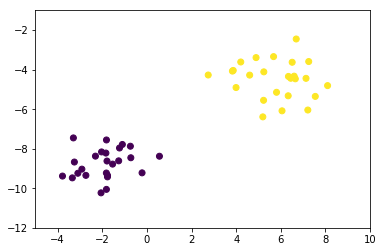

In [75]:
plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.axis([-5,10,-12,-1])
plt.show()

### Parameters

In [76]:
w=[]
b=[]
max_feature_value = np.max(X)
min_feature_value = np.min(X)
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001]

### SVM Training

In [81]:
i=1
global w
global b
length_Wvector = {}
transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
b_step_size = 2
b_multiple = 5
w_optimum = max_feature_value*0.5
for lrate in tqdm(learning_rate):
    w = np.array([w_optimum,w_optimum])     
    optimized = False
    while not optimized:
        for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
            for transformation in transforms:
                w_t = w*transformation
                correctly_classified = True
                for yi in data_dict:
                    for xi in data_dict[yi]:
                        if yi*(np.dot(w_t,xi)+b) < 1:
                            correctly_classified = False
                if correctly_classified:
                    length_Wvector[np.linalg.norm(w_t)] = [w_t,b]
        if w[0] < 0:
            optimized = True
        else:
            w = w - lrate
    norms = sorted([n for n in length_Wvector])
    minimum_wlength = length_Wvector[norms[0]]
    w = minimum_wlength[0]
    b = minimum_wlength[1]
    w_optimum = w[0]+lrate*2

100%|██████████| 3/3 [00:14<00:00,  4.30s/it]


### Hyperplane

In [82]:
def hyperplane_value(x,w,b,v):
    return (-w[0]*x-b+v) / w[1]

### Visualize

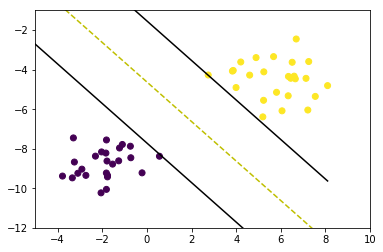

In [92]:
plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
datarange = (min_feature_value*0.9,max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]
psv1 = hyperplane_value(hyp_x_min, w, b, 1)
psv2 = hyperplane_value(hyp_x_max, w, b, 1)
plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')
nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')
db1 = hyperplane_value(hyp_x_min, w, b, 0)
db2 = hyperplane_value(hyp_x_max, w, b, 0)
plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
plt.axis([-5,10,-12,-1])
plt.show()

### Predict Function

In [102]:
def predict(features):
    dot_result = np.sign(np.dot(np.array(features),w)+b)
    return dot_result.astype(int)

### Predict

In [103]:
y[y == 0] = -1
ypred = predict(X)
y == ypred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])